<h4>Librerie Necessarie:</h4>

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h4>Lettura del DataFrame:</h4>

In [14]:
df = pd.read_csv("../data/star_classification.csv")

In [15]:
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

<h4>Come possiamo notare, non abbiamo valori nulli. Ottimo per poterci alleggerire la fase di pulizia dei dati</h4>

In [17]:
df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


<h3>1. PULIZIA DEI DATI</h3>

<h4>Rinominazione delle colonne: u, g, r, i, z, al fine di garantire maggiore chiarezza dei dati</h4>

In [18]:
df.rename(columns={
    "u": "ultraviolet",
    "g": "green",
    "r": "red",
    "i": "near_infrared",
    "z": "infrared"
}, inplace=True) # con il valore andiamo ad indicare di andare a modificare il dataframe originale, senza creare una copia

<p>Spiegazione colonne DataFrame: </p>
<ul>
    <li>Alpha e delta: posizione dell'oggetto nel cielo</li>
    <li>U, g, r, i, z: spettro di luce che emana l'oggetto</li>
    <li>Class: classificazione dell'oggetto</li>
    <li>Redshift: misura quanto la luce di un oggetto è spostato verso il rosso rispetto a come viene emessa</li>
    <li>Plate: tipo di fibra usato nell'obbiettivo</li>
    <li>MJD: data in cui è stata scattata la foto, basandosi sul calendario Giuliano modificato</li>
</ul>

<h4>Eliminazione colonne superflue per l'esplorazione dei dati</h4>

In [19]:
uselessColumns = ['run_ID', 'rerun_ID', 'cam_col', 'fiber_ID', 'field_ID']
df = df.drop(uselessColumns, axis=1)

print(f"Sono state cancellate le seguenti colonne: {uselessColumns}")
df

Sono state cancellate le seguenti colonne: ['run_ID', 'rerun_ID', 'cam_col', 'fiber_ID', 'field_ID']


,obj_ID,alpha,delta,ultraviolet,green,red,near_infrared,infrared,spec_obj_ID,class,redshift,plate,MJD
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,6.543777e+18,GALAXY,0.634794,5812,56354
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,1.176014e+19,GALAXY,0.779136,10445,58158
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,5.152200e+18,GALAXY,0.644195,4576,55592
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,1.030107e+19,GALAXY,0.932346,9149,58039
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,6.891865e+18,GALAXY,0.116123,6121,56187
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,1.055431e+19,GALAXY,0.000000,9374,57749
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,8.586351e+18,GALAXY,0.404895,7626,56934
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,3.112008e+18,GALAXY,0.143366,2764,54535
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,7.601080e+18,GALAXY,0.455040,6751,56368


<h3>2. Analisi Esplorativa Dei Dati</h3>

<h4>a. Contiamo le ricorrenze della colonna target "class"</h4>

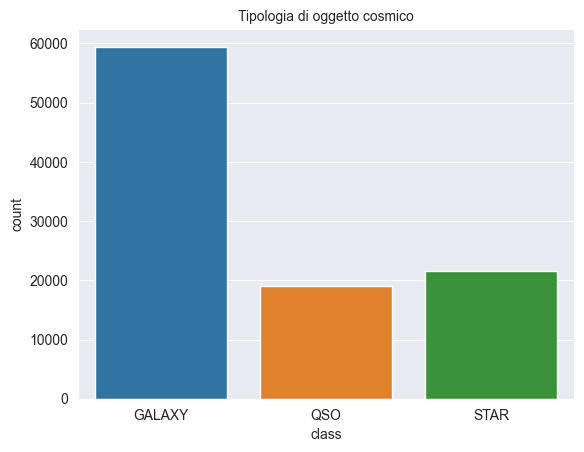

In [20]:
sns.countplot(data=df, x="class", hue="class")
plt.title("Tipologia di oggetto cosmico",fontsize=10)
plt.show()

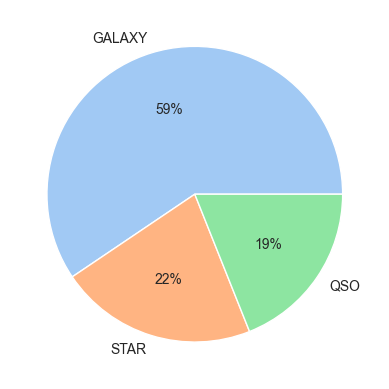

class
GALAXY    59445
STAR      21594
QSO       18961
Name: count, dtype: int64

In [21]:
data = df["class"].value_counts()
labels = ['GALAXY', 'STAR', 'QSO']
# define Seaborn color palette to use
colors = sns.color_palette('pastel')

# plotting data on chart
plt.pie(data, labels=labels, colors=colors, autopct='%.0f%%')
plt.show()
data

<h5>Possiamo notare come la classe prioritaria "GALAXY" sia circa il 60% dei dati complessivi, rispetto alle altre due minoritarie molto simili, "START" e "QSO", che si attestano intorno al 20%. Il DataSet non presenta un forte sbilanciamento.</h5>

<h4>b. Stampiamo la HEATMAP per verificare la correlazione delle variabili</h4>

<h5>Applichiamo una funzione encoder sulle colonne non numeriche</h5>

In [22]:
def encode_class(value):
    if value == "GALAXY":
        return 0
    elif value == "STAR":
        return 1
    else:
        return 2
    
df_encoded = df.copy()
df_encoded["class"] = df_encoded["class"].apply(encode_class)

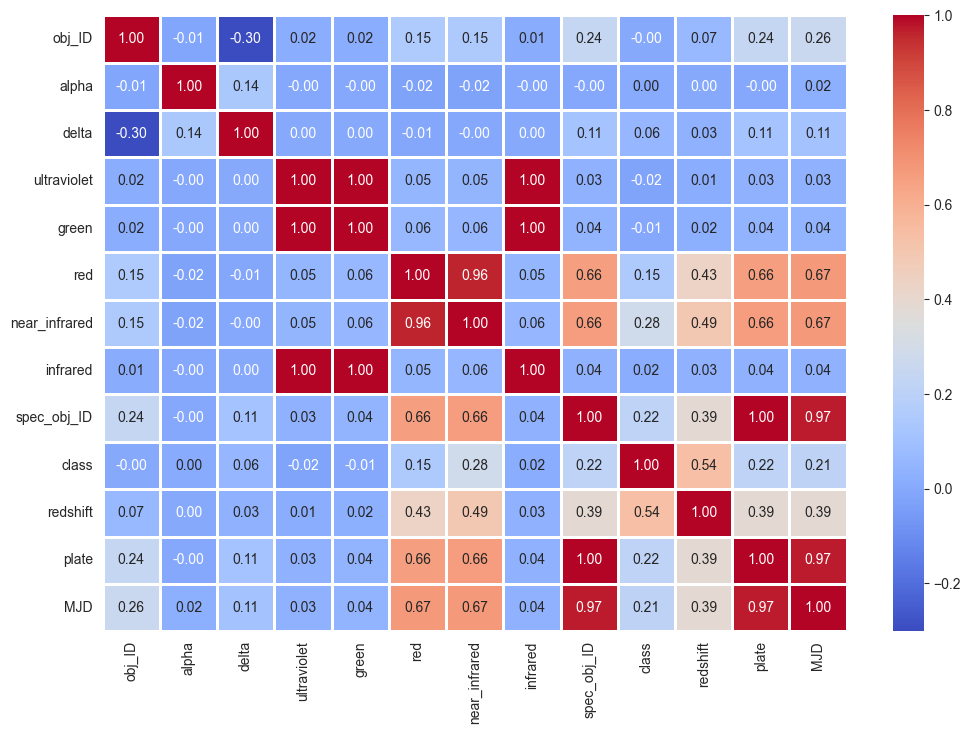

In [23]:
f,ax = plt.subplots(figsize=(12,8))
sns.heatmap(df_encoded.corr(), cmap="coolwarm", annot=True, linewidths=1, fmt= '.2f',ax=ax)
plt.show()

<h4>c. Relazione tra bande fotometrice tramite scatterplot</h4>

In [24]:
'''
sns.pairplot(
    df[["ultraviolet", "green", "red", "near_infrared", "infrared", "class"]],
    hue="class",
    diag_kind="hist",
    plot_kws={"alpha": 0.5, "s": 20}
)

plt.show()
'''

'\nsns.pairplot(\n    df[["ultraviolet", "green", "red", "near_infrared", "infrared", "class"]],\n    hue="class",\n    diag_kind="hist",\n    plot_kws={"alpha": 0.5, "s": 20}\n)\n\nplt.show()\n'

<h5>Si può notare come, in alcuni scatterplot, non si riesca a differenziare bene la differenza di classe, sovrapponendosi.</h5>

<h5>Quelli che sembrano dividere meglio sono: </h5>

<ul>
    <li>Red and Near_infrared</li>
    <li>ultraviolet and infrared, differenza tra STAR e GALAXY ma non buona per QSO</li>
    <li>Green and Near_infrared, uguale per i QSO</li>
</ul>